#<div dir="rtl" align=center> unit 4 exercises </div>

---




In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
url = "https://data.cyber.org.il/virtual_courses/introdata/colab/spotify_tracks.csv" 

In [5]:
tracks = pd.read_csv(url)

In [6]:
flying_mice_song_lengths = np.array([167, 162, 152, 153, 169, 145, 143, 152, 164, 144])

1: Make your own code to create a histogram without using plt.hist, but only np.histogram and plt.bar.

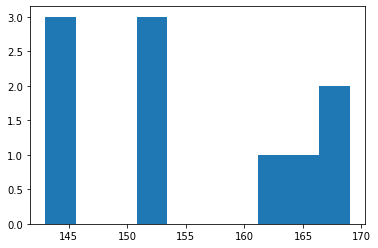

In [7]:
counts, bins = np.histogram(flying_mice_song_lengths, bins=10)
xtick_positions = (bins[:-1] + bins[1:]) / 2 
plt.bar(xtick_positions, counts, width=bins[1] - bins[0])
plt.show()

2: Create a bar graph describing the number of songs from each value of the mode column (which, as you remember, indicates the scale of the song - major or minor scale). Don't forget to add labels to each of the axes so that their meaning can be interpreted, and of course also a title for the chart.

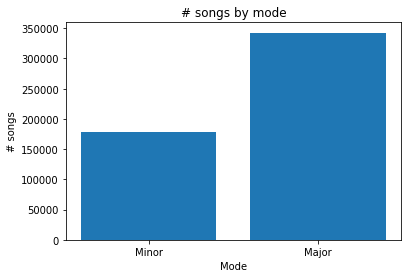

In [8]:
mode_counts = tracks['mode'].value_counts().sort_index()
# 0 is Minor, 1 is Major
plt.bar(['Minor','Major'], mode_counts)
plt.xlabel('Mode')
plt.ylabel('# songs')
plt.title('# songs by mode')
plt.show()

3: Create a bar graph depicting the number of songs by the following artists and bands:

The band Mashina (Mashina).

The band Florence + The Machine

Singer Arkadi Duchin

The band Mother Mother

Singer Yuval Dayan

The band Daft Punk

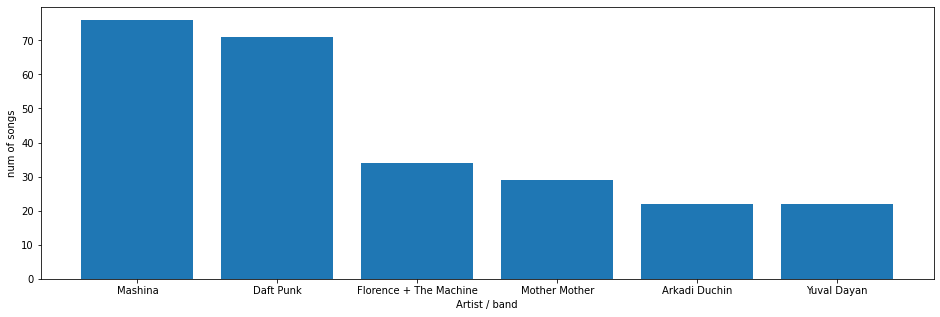

In [9]:
bands = [
    'Mashina', 'Florence + The Machine', 'Arkadi Duchin',
    'Mother Mother', 'Yuval Dayan', 'Daft Punk'
]

artists = tracks.loc[tracks.artists.isin(bands),'artists']
band_counts = artists.value_counts()

plt.figure(figsize=(16, 5))
plt.bar(band_counts.index, band_counts)
plt.xlabel('Artist / band')
plt.ylabel('num of songs')
plt.show()

4:Show a histogram of the song lengths of the singer Etti Ankri.
From looking at the visual display alone, try to estimate (in general) the mean and median of the length of the songs.
Calculate the mean and median and compare the answers to the ones you suggested in the previous section.

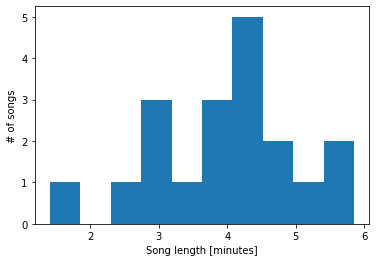

In [13]:
etti_ankri_df =  tracks[ tracks['artists'] == 'Etti Ankri']
plt.hist(etti_ankri_df['duration_minutes'])
plt.xlabel('Song length [minutes]')
plt.ylabel('# of songs')
plt.show()

In [14]:
print('Mean:', etti_ankri_df['duration_minutes'].mean()) 
print('Median:', etti_ankri_df['duration_minutes'].median())

Mean: 3.961738596491229
Median: 4.190666666666667


5: Draw histograms of the valence column (which, as mentioned, indicates the degree of positivity in the song) for the two famous singers Frank Sinatra and Elvis Presley. What can you guess about their musical style from looking at the histograms?
Note: Draw both histograms on the same chart and add appropriate labels and legend.

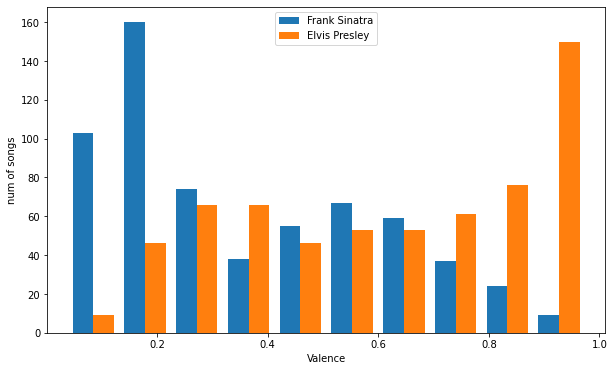

In [16]:
plt.figure(figsize=(10, 6))
plt.hist([ tracks[ tracks['artists'] == 'Frank Sinatra']['valence'],
          tracks[ tracks['artists'] == 'Elvis Presley']['valence']],
        label=['Frank Sinatra', 'Elvis Presley'])
plt.xlabel('Valence')
plt.ylabel('num of songs')
plt.legend()
plt.show()

6:The variable flying_mice_song_lengths includes a list of "flying mice" song lengths:
flying_mice_song_lengths=[167, 162, 152, 153, 169, 145, 143, 152, 164, 144]

Use the data and calculate with the help of numpy a frequency table in which it is divided into ranges of size 10, according to the following division:
120–129, 130–139, 140–149 [...] 180–190
Calculate the table again for ranges of size 10, but this time the range definitions will be slightly different:
125–134, 135–144, 145–154 [...] 185–194
Compare the frequencies obtained in each range. Do you think these differences are essential or not? Are there other divisions of the same data in ranges of 10?

In [17]:
counts, bins = np.histogram(flying_mice_song_lengths, range(120, 191, 10))
print(bins)
print(counts)

[120 130 140 150 160 170 180 190]
[0 0 3 3 4 0 0]


In [18]:
counts, bins = np.histogram(flying_mice_song_lengths, range(125, 195, 10))
print(bins)
print(counts)

[125 135 145 155 165 175 185]
[0 2 4 2 2 0]


7: Given the following frequency table of some data series:

value frequency

20 3

28 7

31 1

47 4

59 2

Calculate the mean of the data series.

In [19]:
# Answer: 34.88

8: Calculate the histogram of song durations in minutes, without specifying ranges.

In [21]:
np.histogram(tracks['duration_minutes'])

(array([ 38004, 151405, 208007,  83288,  23381,   9148,   4010,   2131,
          1126,    760]),
 array([ 0.769   ,  1.990945,  3.21289 ,  4.434835,  5.65678 ,  6.878725,
         8.10067 ,  9.322615, 10.54456 , 11.766505, 12.98845 ]))

9: Calculate the histogram of the duration of the songs in minutes according to the following ranges: 0–1, 1–2 […] 12–13. What is the most common range?

In [23]:
np.histogram(tracks['duration_minutes'], range(14)) # 3 - 4 min

(array([  3929,  34466, 108967, 189197, 113095,  40497,  15269,   7342,
          3688,   2207,   1226,    787,    590]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))

10: We saw that the difference between the average and the median length of Hava Alberstein's songs is small compared to the general rule. Look at the histograms presented in the last two exercises: in one the lengths of the songs in the entire database and in the second the lengths of the songs of Chava Elberstein. Determine: Which of the following sentences can explain the difference?

Answer: In the general database some of the songs are particularly long, but there are none in the songs of Chava Elberstein.

11: Show a line graph outlining the number of new songs released each year. As usual, take care to design the diagram so that it is easy to understand.

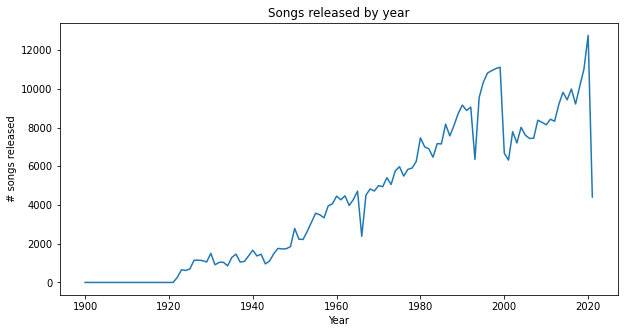

In [25]:
earliest_year = tracks['release_year'].min()
most_recent_year = tracks['release_year'].max()
relevant_years = range(earliest_year, most_recent_year + 1)
songs_released_per_year = []

for year in relevant_years:     
  songs_released_per_year.append(len(tracks[tracks['release_year'] == year]))

plt.figure(figsize=(10, 5))
plt.plot(relevant_years, songs_released_per_year)
plt.title('Songs released by year')
plt.xlabel('Year')
plt.ylabel('# songs released')
plt.show()

12: Look at the line graph you created in the previous question.

What general trend is visible in the chart?
What research questions emerge from the diagram?
You can see that the last year is 2021 and that the number of songs published in it is significantly lower than the trend towards that year. Make at least two different hypotheses that explain this fact.

Answer: Option A:
In general, there is an upward trend - almost every year, more songs are published.
Option B:
There are several points of interest:
The graph curve begins to climb starting from 1920. One might ask why this is the earliest publication year of the songs in the database (perhaps only then was recording technology of sufficient quality available to be included in the platform? There are many other possibilities).
A sharp decrease (and a sharp increase) is seen around 1965, one can ask what happened in that year.
At the beginning of the 2000s there is a sharp decrease followed by no increase - it is particularly interesting to understand why.
As section C implies, in 2021 there is also a sharp drop, what really happened there?
Option C:
One (correct) hypothesis is that the course was written during 2021 and the data was collected in the middle of the year, so we only see partial data for 2021 (compared to the other years for which we see full data). Another hypothesis is that the corona epidemic, which affected all areas of life in 2020-2021, affected the ability of artists and bands to work and publish songs. And it is also possible to raise additional hypotheses. One way to test the hypotheses is to locate when the course was written; Another way is to collect the data again after the end of 2021 and draw the graph once more.

13: Draw a line graph showing the number of songs published each year by each of the following singers of the Banai family:

Yossi Banai
Meir Banai
Ehud Banai
Eviatar Banai
'Play' with the design of the graph and try to achieve an easy-to-read display as possible.

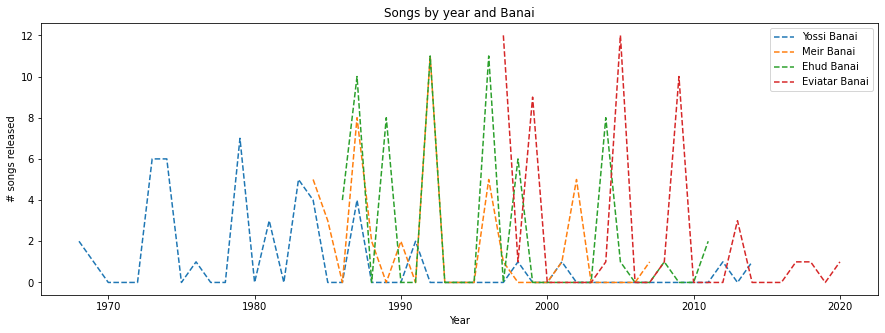

In [27]:
artists = [
    'Yossi Banai',
    'Meir Banai',
    'Ehud Banai',
    'Eviatar Banai'
]
plt.figure(figsize=(15, 5))
for artist in artists:
    artist_df = tracks[tracks['artists'] == artist]
    earliest_year = artist_df['release_year'].min()
    most_recent_year = artist_df['release_year'].max()
    relevant_years = range(earliest_year, most_recent_year + 1)
    songs_per_year = []
    for year in relevant_years:
        songs_per_year.append(len(artist_df[artist_df['release_year'] == year]))

    plt.plot(relevant_years, songs_per_year, label=artist, linestyle='--')

plt.legend()
plt.xlabel('Year')
plt.ylabel('# songs released')
plt.title('Songs by year and Banai')
plt.show()

14: In the last hundred years, many changes have occurred in the music industry in several aspects, such as the recording technologies, media in which the songs were published (from records to CDs to streaming, from the development of the radio [and its decline?] through channels like MTV and so on), musical styles and more. It is interesting to examine how these changes are reflected in the database.
Draw a line graph that shows, by year, the typical length of songs published in that year. For this the graph should include not one line but three lines:

Average song length by year
Average song length minus one standard deviation per year
Average song length and one standard deviation per year

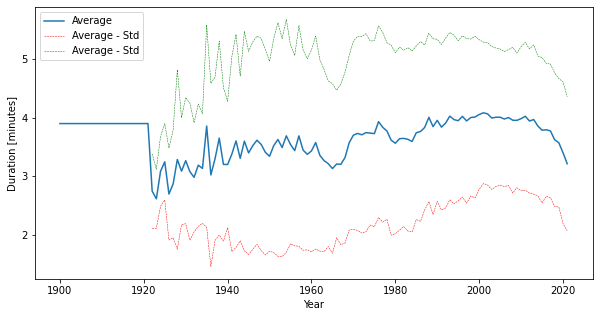

In [28]:
earliest_year = tracks['release_year'].min()
most_recent_year = tracks['release_year'].max()
relevant_years = range(earliest_year, most_recent_year + 1)

years = []
avg_song_length = []
avg_minus_1_std = []
avg_plus_1_std = []
for year in relevant_years:
  curr_year_df = tracks[tracks['release_year'] == year]
  if len(curr_year_df) > 0:
    curr_year_avg = curr_year_df['duration_minutes'].mean()
  curr_year_std = curr_year_df['duration_minutes'].std()

  years.append(year)
  avg_song_length.append(curr_year_avg)
  avg_minus_1_std.append(curr_year_avg - curr_year_std)
  avg_plus_1_std.append(curr_year_avg + curr_year_std)

plt.figure(figsize=(10, 5))
plt.plot(years, avg_song_length, label='Average')
plt.plot(years, avg_minus_1_std, label='Average - Std',
color='r', linestyle='--', linewidth=.5)
plt.plot(years, avg_plus_1_std, label='Average - Std',
color='g', linestyle='--', linewidth=.5)
plt.xlabel('Year')
plt.ylabel('Duration [minutes]')
plt.legend()
plt.show()

15: Look at the graph you created in the previous question, which depicts the average and standard deviation of song lengths over the years. What trends do you see? How will you interpret them?

Answer: You can definitely see changes in the length of the songs over the years.
for example:
The last decade is characterized by a decrease in the typical length of songs, perhaps due to the popularity of streaming apps and perhaps due to other factors.
In the early 1970s there was a sharp decline and then a sharp rise.
It seems that in the 1950s the standard deviation in song lengths was particularly long, which indicates a variety that existed then in song lengths.

16: We discussed the question - how far can the data be moved so that it still reflects the original data?
Try the following change to the last example: Multiply the series of random numbers by some factor (after subtracting 0.5).
Explain how this coefficient affects the display.

Answer 1: The trend is still noticeable but the separation between the groups of points is maintained much more.

Answer 2: Although the general trend was still maintained, the displacement of the points is much greater, so they are less representative of the real data.

17: Present a scatter graph that describes the relationship between the year of publication of a song and its popularity. Pay attention to the design of the chart.

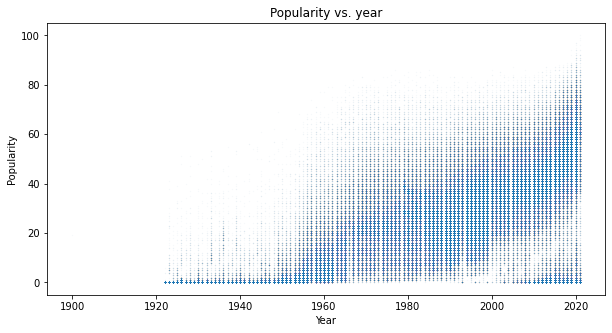

In [30]:
plt.figure(figsize=(10, 5))
plt.scatter(tracks['release_year'], tracks['popularity'],marker='.', alpha=.05, s=.5)
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Popularity vs. year')
plt.show()

18: Look at the diagram you created. What trend can be seen between the year of publication and the popularity?

In [32]:
# Answer: Positive - the later the publication year, the greater the popularity

19: Make at least two hypotheses that explain the trend seen in the chart you created between the year of publication and popularity.

Answer: 
Option A:
As time goes by artists become better and therefore the popularity of their songs increases.

Option B:
Popularity is measured by the amount of plays of a song at a given time. For the most part, the amount of playback of songs decreases over time, so the popularity of older songs is lower.

20: Present a scatter graph describing the relationship between the 'positivity' of the song (Valence) and energy (Energy). Display the data separately (but in the same chart) for the following bands and artists:

Metallica band
The singer Celine Dion
The band 'The Pale Tracker' (HaGashash HaHiver)
After you draw the graph, listen to several songs by the artists you examined on the graph and think about how your impression of them relates to what you can see on the graph.

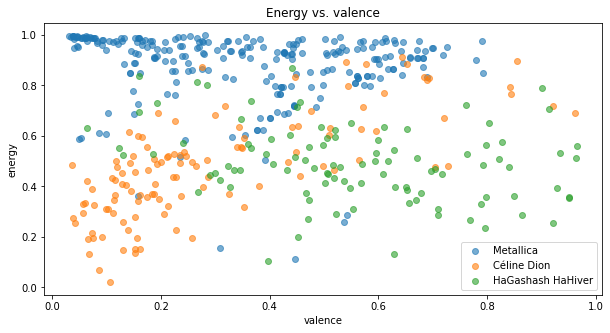

In [33]:
artists = [
    'Metallica',
    'Céline Dion',
    'HaGashash HaHiver'
]

plt.figure(figsize=(10, 5))
for artist in artists:
    artist_df = tracks[tracks['artists'] == artist]
    plt.scatter(artist_df['valence'], artist_df['energy'],
                label=artist, alpha=.6)

plt.legend()
plt.xlabel('valence')
plt.ylabel('energy')
plt.title('Energy vs. valence')
plt.show()

#<div dir="rtl" align=center> unit 4 summary exercises </div>


In [34]:
url1 =  "https://s3.eu-west-1.amazonaws.com/data.cyber.org.il/virtual_courses/introdata/colab/youth_survey_preprocessed.csv"


In [35]:
df = pd.read_csv(url1)

21: The database contains the Education column, which describes the level of education of survey participants, at the time of filling out the survey. Present a bar graph depicting the number of participants according to their level of education.

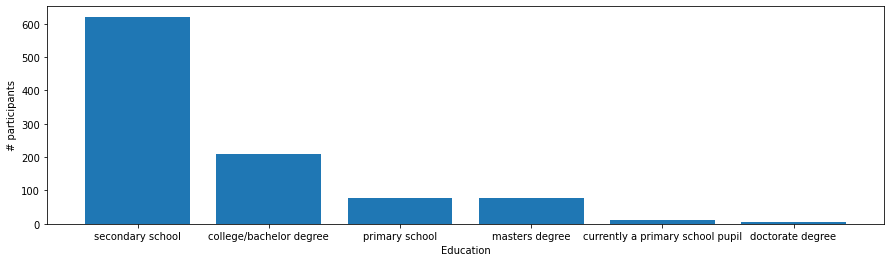

In [36]:
plt.figure(figsize=(15, 4))
edu_counts = df['Education'].value_counts()
plt.bar(range(len(edu_counts)), edu_counts)
plt.xticks(range(len(edu_counts)), edu_counts.index)
plt.xlabel('Education')
plt.ylabel('# participants')
plt.show()

22: Present a bar graph of the ages of the participants in the study (the age is described in the Age column). Sort the view by age (left to right).

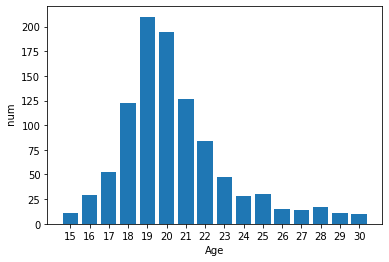

In [37]:
age_counts = df['Age'].value_counts().sort_index()
plt.bar(range(len(age_counts)), age_counts)
plt.xticks(range(len(age_counts)), age_counts.index)
plt.xlabel('Age')
plt.ylabel(' num')
plt.show()

23: What is the most common age among research participants?

Answer: 19

24: present a histogram of the weights of the participants in the study (described in the Weight column); The histogram must contain 20 ranges.

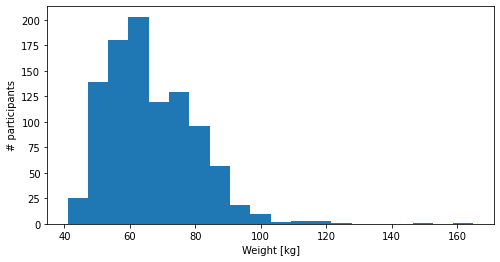

In [38]:
plt.figure(figsize=(8, 4))
plt.hist(df['Weight'], bins=20)
plt.xlabel('Weight [kg]')
plt.ylabel('# participants')
plt.show()

25: They presented another histogram of the weights of the participants in the study, but this time separated it into two parts according to the gender of the participant. Here, too, the histogram must contain 20 ranges.

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


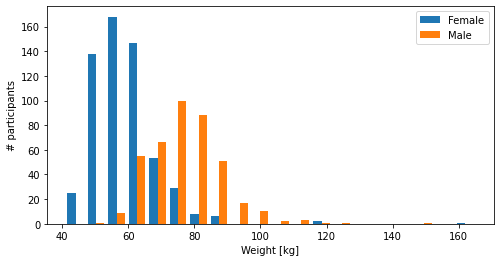

In [40]:
female_df = df[df['Gender'] == 'female']
male_df = df[df['Gender'] == 'male']

plt.figure(figsize=(8, 4))
plt.hist([female_df['Weight'], male_df['Weight']],
         label=['Female', 'Male'], bins=20)
plt.xlabel('Weight [kg]')
plt.ylabel('# participants')
plt.legend()
plt.show()

26: Following the diagram you created in the last exercise, mark all the correct statements:

Answer:
1: There are more female participants than male participants in the study, so the histogram columns for the women tend to be higher.
2:Among women there is more representation for weights around 60 kilograms and among men there is more representation for weights around 80 kilograms.


27: One of the questions in the study was (in free translation) "I would like to change some of my actions in the past." (The answers are on a scale of 1-5, where 1 means not at all and 5 means very much). The answers to this question are in the Changing the past column. Create a line graph display depicting the mean answer to this question by age.

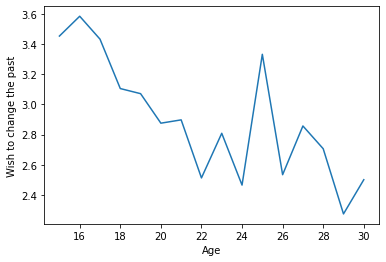

In [41]:
relevant_ages = range(df['Age'].min(), df['Age'].max() + 1)
avg_change_the_past_answers = []
for age in relevant_ages:
    age_df = df[df['Age'] == age]
    avg_change_the_past_answers.append(age_df['Changing the past'].mean())

plt.plot(relevant_ages, avg_change_the_past_answers)
plt.xlabel('Age')
plt.ylabel('Wish to change the past')
plt.show()

28: Following the diagram you created in the last exercise, answer true/false:
The diagram shows that in general, as people grow older, their desire to change the past decreases.

Answer: right

29:Following the previous question, answer true / false:
It is likely that the observed trend (decreasing desire to change the past as you get older) is also true for ages that are not in the database.

Answer: no right

30: The Aging column describes the participants' answer to the question "How afraid are you of growing up/aging?" (the answers are on a scale of 1-5, where 1 means not at all and 5 means very much). Create a line graph display showing the average answer to this question by age, for each gender - a separate line. What can you say about the data after looking at the chart?

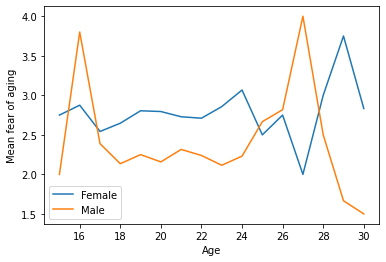

In [42]:
female_df = df[df['Gender'] == 'female']
male_df = df[df['Gender'] == 'male']

relevant_ages = range(df['Age'].min(), df['Age'].max() + 1)
female_avg_fear_or_aging_answers = []
male_avg_fear_or_aging_answers = []
for age in relevant_ages:
    female_age_df = female_df[female_df['Age'] == age]
    male_age_df = male_df[male_df['Age'] == age]
    female_avg_fear_or_aging_answers.append(female_age_df['Ageing'].mean())
    male_avg_fear_or_aging_answers.append(male_age_df['Ageing'].mean())

plt.plot(relevant_ages, female_avg_fear_or_aging_answers, label='Female')
plt.plot(relevant_ages, male_avg_fear_or_aging_answers, label='Male')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Mean fear of aging')
plt.show()

31: We will now examine the relationship between the participants' height and weight. Draw a scatter graph of the Height and Weight columns.
Note that there are several problematic records (for example the record we saw in chapter 3, where there was a typo in the height of a participant), design the display so that we ignore these records and focus on the main mass of the data.

Looking at the graph, what can you say about the relationship between height and weight?

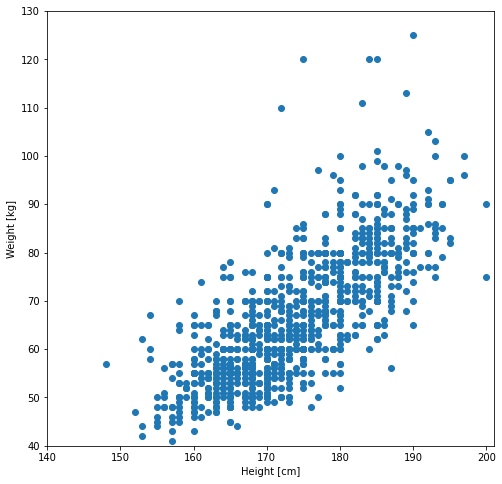

In [43]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height [cm]')
plt.ylabel('Weight [kg]')
plt.xlim((140, 201))
plt.ylim((40, 130))
plt.show()

In [45]:
# there are a clear relationship between height and weight, as expected: as the height increases, so does the weight.

32: Following on from the previous question, create another scatter graph between height and weight, but now divide it according to gender - scatter in one color for women and scatter in another color for men. What can you tell from looking at the display?

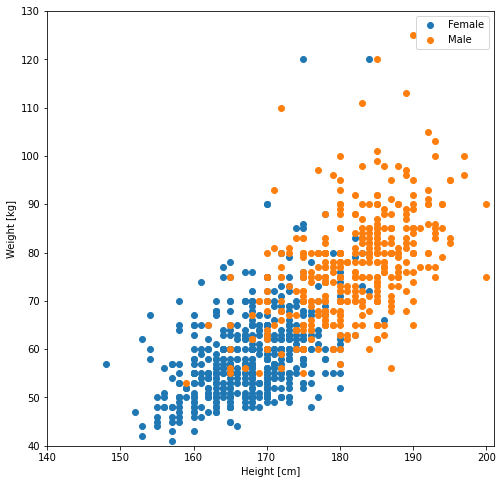

In [46]:
female_df = df[df['Gender'] == 'female']
male_df = df[df['Gender'] == 'male']

plt.figure(figsize=(8, 8))
plt.scatter(female_df['Height'], female_df['Weight'], label='Female')
plt.scatter(male_df['Height'], male_df['Weight'], label='Male')
plt.xlabel('Height [cm]')
plt.ylabel('Weight [kg]')
plt.xlim((140, 201))
plt.ylim((40, 130))
plt.legend()
plt.show()

You can see that the women's data tend to be concentrated in the smaller height and weight area and the men's data in the larger height and weight area.

33: Some of the questions in the questionnaire refer to the degree of interest of the participants in topics such as science, history, etc. (the answers are on a scale of 1-5, with 1 meaning not interested at all and 5 meaning very interested). Three of the fields that appear in the questionnaire are: Biology, Chemistry and Medicine. We will now examine the relationship between these variables: create a scatter graph to show the relationship between the average levels of interest in medicine and chemistry and the level of interest in biology. Note that since we are talking about whole values ​​(almost, there are also halves because of the average), the points must be moved randomly to see the trend. What can you say about the relationship between these variables?

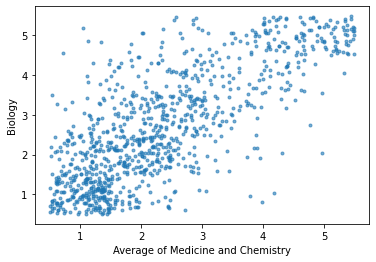

In [47]:
df['medicine_chemistry_avg'] = (df['Medicine'] + df['Chemistry']) / 2
plt.scatter(df['medicine_chemistry_avg'] + np.random.random(df.shape[0]) - .5,
            df['Biology'] + np.random.random(df.shape[0]) - .5,
            s=9, alpha=.6)
plt.xlabel('Average of Medicine and Chemistry')
plt.ylabel('Biology')
plt.show()

It can be seen that in general, as the levels of interest in medicine and chemistry increase, so does the degree of interest in biology.